# Logistics Regression
 - Data Preparation
 - Visualisation
 - Create Train & Test data
 - Create a logistic regression model
 - Predictions
 - Descion history
 - How to use sk-learn

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


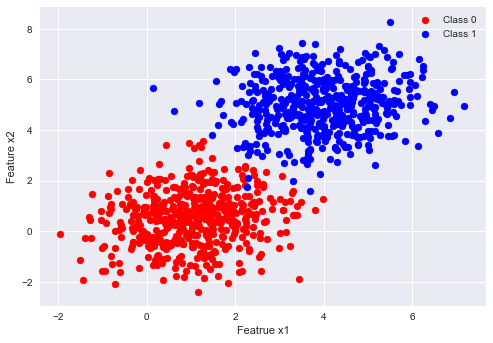

In [17]:
plt.style.use('seaborn')
plt.scatter(dist_01[:, 0], dist_01[:,1],color='red', label="Class 0")
plt.scatter(dist_02[:, 0], dist_02[:,1],color='blue', label="Class 1")
plt.xlabel("Featrue x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [18]:
data = np.zeros((1000, 3))

In [19]:
# generating the final data matrix
data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1 #putting half the value as 1 which s the output

In [20]:
# Randomly shuffling the data
np.random.shuffle(data)
print(data[:10])

[[ 2.9889683   5.6548168   1.        ]
 [ 0.15674238  1.38973685  0.        ]
 [ 1.69452099  1.41879574  0.        ]
 [ 0.44637967  0.79887253  0.        ]
 [ 5.96268455  5.31579237  1.        ]
 [ 3.339602    5.14547709  1.        ]
 [ 6.13998472  3.38410448  1.        ]
 [ 1.29510846  1.36766678  0.        ]
 [ 1.77743443  0.85022538  0.        ]
 [-0.802705    0.88119489  0.        ]]


In [21]:
#Divide the data into train and the test data
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


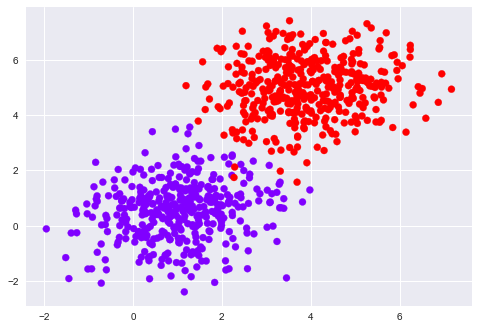

In [22]:
#plot the training data and normalise it
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.rainbow)
plt.show()

In [23]:
#data normalisation
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

#apply the transformation
X_train = (X_train - x_mean)*x_std

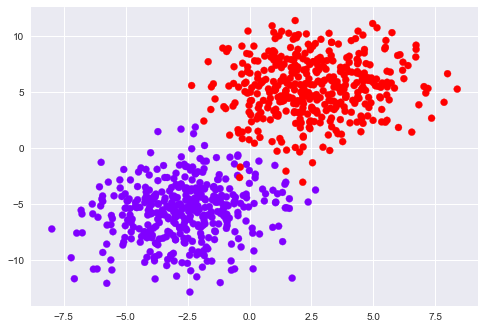

In [24]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.rainbow)
plt.show()
#the following graph is now centered about origin

In [25]:
X_train.mean(axis=0)#very close to origin

array([-6.63635813e-16, -7.63611396e-15])

## Logistics Regression Implementation

In [26]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    '''
    X = entire array(m, n+1) -->1 column of ones for x0
    theta - np.array(n+1, 1)
    '''
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    '''
    params:
    X - (m, n+1)
    y - (m, 1)
    theta - np.array(n+1, 1)
    
    return:
        scale_value = loss
    '''
    
    hi = hypothesis(X, theta)
    error = -1 * np.mean((y*np.log(hi) - ((1-y) * np.log(1 - hi))))
    return error


In [27]:
def gradient(X, y, theta):
    '''
    params:
    X - (m, n+1)
    y - (m, 1)
    theta - np.array(n+1, 1)
    
    return:
        graident vector = (n+1, 1)
    '''
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hi))   #refer notes
    m = X.shape[0]
    return grad/m

def gradient_descent(X, y, lr=0.5, max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        #Udate
        theta = theta - lr*grad
        
    return theta, error_list

In [28]:
ones = np.ones((X_train.shape[0], 1))
X_New_train = np.hstack((ones, X_train))
print(X_New_train.shape)
print(X_New_train)

Y_train = Y_train.reshape((-1,1))

(800, 3)
[[ 1.          0.88883902  7.03503574]
 [ 1.         -4.20090119 -3.50512679]
 [ 1.         -1.43738803 -3.43331445]
 ...
 [ 1.         -4.14127391 -8.01089783]
 [ 1.         -1.74470979 -8.84038159]
 [ 1.          1.64324436  6.23650627]]


In [29]:
theta, error_list = gradient_descent(X_New_train, Y_train)

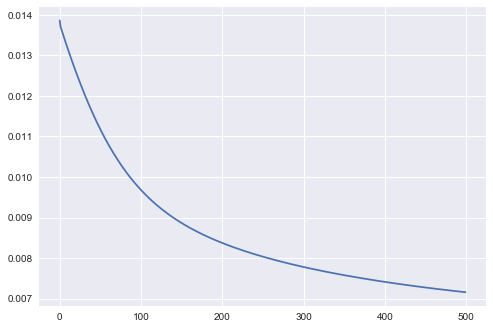

In [30]:
plt.plot(error_list)
plt.show()

In [31]:
Y_train = Y_train.reshape((-1, ))

## Visualise Descision surface

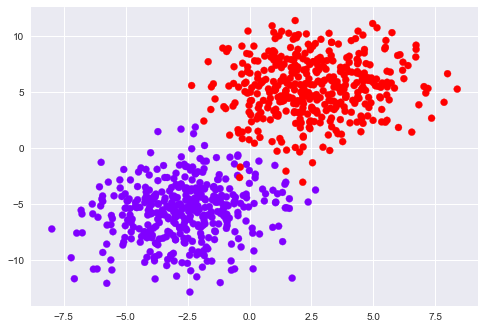

In [32]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.rainbow)
plt.show()

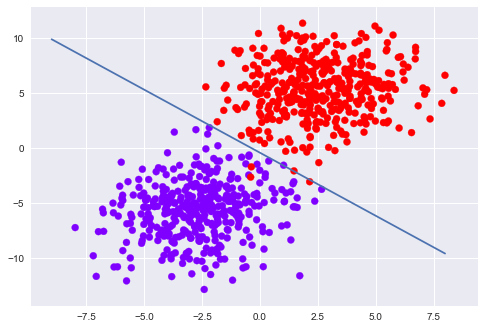

In [33]:
x1 = np.arange(-9, 9)
#print(x1)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1, x2)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.rainbow)
plt.show()

## Predictions & Accuracy

In [48]:
ones = np.ones((X_test.shape[0], 1))
X_New_test = np.hstack((ones, X_test))
print(X_New_test.shape)
print(X_New_test[:3,:])

(200, 3)
[[1.         4.42321631 4.59041482]
 [1.         4.72882225 3.7695085 ]
 [1.         1.17693121 3.39001721]]


In [50]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1

    output = output.astype('int')
    return output

XT_pred = predict(X_New_train, theta)
Xt_pred = predict(X_New_test, theta)

In [51]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))
    acc = np.sum(actual==preds)/ actual.shape[0]
    return acc* 100

In [52]:
train_acc = accuracy(Y_train, XT_pred)
test_acc = accuracy(Y_test, Xt_pred)

In [54]:
train_acc

99.5

In [55]:
test_acc

52.0

# How to use sk learn ?

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, Y_train)

LogisticRegression()

In [59]:
theta_0 = model.intercept_
theta_s = model.coef_
print(theta_0, theta_s)

[0.75393014] [[1.62305762 1.45280946]]


In [60]:
theta

array([[0.61714141],
       [1.7396899 ],
       [1.51557583]])

In [61]:
model.score(X_train, Y_train)

0.995

In [62]:
model.score(X_test, Y_test)

0.515

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [67]:
X_New_train

array([[ 1.        ,  0.88883902,  7.03503574],
       [ 1.        , -4.20090119, -3.50512679],
       [ 1.        , -1.43738803, -3.43331445],
       ...,
       [ 1.        , -4.14127391, -8.01089783],
       [ 1.        , -1.74470979, -8.84038159],
       [ 1.        ,  1.64324436,  6.23650627]])

In [68]:
Y_train.shape

(800,)

In [69]:
X_New_train

array([[ 1.        ,  0.88883902,  7.03503574],
       [ 1.        , -4.20090119, -3.50512679],
       [ 1.        , -1.43738803, -3.43331445],
       ...,
       [ 1.        , -4.14127391, -8.01089783],
       [ 1.        , -1.74470979, -8.84038159],
       [ 1.        ,  1.64324436,  6.23650627]])